## This colab uses COVID data to compare the PCA and LDA using scikit

## 1. Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os 
os.chdir('/content/drive/My Drive/Colab Notebooks/')
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


Refer : https://analyticsindiamag.com/practical-approach-to-dimensionality-reduction-using-pca-lda-and-kernel-pca/

https://towardsdatascience.com/interesting-projections-where-pca-fails-fe64ddca73e6

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. import and standardise data


Load the dataset and check NaN values

In [ ]:
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame #### Data.csv   ###KAtrace.csv  ###covid_sample.csv
#df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

df=pd.read_csv('covid_sample.csv', header = 0)
df=df.set_index('Date')
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 259 entries, 09-03-20 to 22-11-20
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         259 non-null    object 
 1   Positive     259 non-null    int64  
 2   Negative     259 non-null    int64  
 3   Recovered    255 non-null    float64
 4   Observation  259 non-null    int64  
 5   Death        259 non-null    int64  
 6   Average_age  259 non-null    int64  
 7   Containment  259 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 18.2+ KB
None


,City,Positive,Negative,Recovered,Observation,Death,Average_age,Containment
Date,,,,,,,,
09-03-20,Bangalore-Urban,579,460,6.0,1452,6,41,1
10-03-20,Bangalore-Urban,60,80,0.0,1345,9,62,1
11-03-20,Bangalore-Urban,92,50,0.0,1657,11,53,1
12-03-20,Bangalore-Urban,131,19,0.0,1877,10,87,1
13-03-20,Bangalore-Urban,33,86,1.0,2221,16,26,1
14-03-20,Kalburgi,48,71,4.0,2572,13,76,0
15-03-20,Kalburgi,125,103,3.0,2935,6,72,0
16-03-20,Bangalore-Urban,75,46,1.0,3049,26,32,1
17-03-20,Kalburgi,64,55,0.0,4030,10,63,0


In [ ]:
#df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
#df.info()
#df=df.to_numeric(df['City']) 


print(df.shape)
df = df.dropna(axis=0,how='any')   ### df = df.fillna(value=0)
print(df.shape)

(259, 8)
(255, 8)


Convert Obejct to Categorical if needed

In [ ]:
print(pd.unique(df['City']), len(pd.unique(df['City'])))

['Bangalore-Urban' 'Kalburgi' 'Madikeri' 'Chikballarpur' 'Mysore'
 'Dharwad' 'Gowribidanur' 'Mangalore' 'Bangalore-Urban ' 'Mangalore '
 'Karwar ' 'Davangere ' 'Udupi' 'Bangalore-Urban  ' 'Bangalore-Rural'
 'Tumkur' 'Karwar' 'Davangere' 'Chikballarpur ' 'Nanjangud'
 'Hospet Bellary' 'Gowribidanur ' 'Bhatkal' 'Bellary' 'Bidar'
 'Basavakalyan ' 'Bagalkote' 'Belgavi' 'Hospet' 'Raibagh '
 'Bangalore-Rural ' 'Mudhol  ' 'Bagalkote ' 'Gadag ' 'Mandya' 'Vijayapura'
 'Hubballi ' 'Malavalli ' 'Raibagh'] 39


In [ ]:
df['City']=pd.core.strings.str_strip(df['City'])
cities = pd.unique(df['City'])
print(cities, len(cities))

['Bangalore-Urban' 'Kalburgi' 'Madikeri' 'Chikballarpur' 'Mysore'
 'Dharwad' 'Gowribidanur' 'Mangalore' 'Karwar' 'Davangere' 'Udupi'
 'Bangalore-Rural' 'Tumkur' 'Nanjangud' 'Hospet Bellary' 'Bhatkal'
 'Bellary' 'Bidar' 'Basavakalyan' 'Bagalkote' 'Belgavi' 'Hospet' 'Raibagh'
 'Mudhol' 'Gadag' 'Mandya' 'Vijayapura' 'Hubballi' 'Malavalli'] 29


In [ ]:
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 255 entries, 09-03-20 to 19-11-20
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   City         255 non-null    category
 1   Positive     255 non-null    int64   
 2   Negative     255 non-null    int64   
 3   Recovered    255 non-null    float64 
 4   Observation  255 non-null    int64   
 5   Death        255 non-null    int64   
 6   Average_age  255 non-null    int64   
 7   Containment  255 non-null    int64   
dtypes: category(1), float64(1), int64(6)
memory usage: 17.7+ KB
None


In [ ]:
cities = df['City'].cat.categories
print(cities, len(cities))

Index(['Bagalkote', 'Bangalore-Rural', 'Bangalore-Urban', 'Basavakalyan',
       'Belgavi', 'Bellary', 'Bhatkal', 'Bidar', 'Chikballarpur', 'Davangere',
       'Dharwad', 'Gadag', 'Gowribidanur', 'Hospet', 'Hospet Bellary',
       'Hubballi', 'Kalburgi', 'Karwar', 'Madikeri', 'Malavalli', 'Mandya',
       'Mangalore', 'Mudhol', 'Mysore', 'Nanjangud', 'Raibagh', 'Tumkur',
       'Udupi', 'Vijayapura'],
      dtype='object') 29


In [ ]:
my_color=df['Containment'].tolist()
target = df['Containment']
print(type(my_color), len(my_color))

<class 'list'> 255


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

Positive        4745.094118
Negative        4551.713725
Recovered        193.752941
Observation    15349.380392
Death              7.705882
Average_age       40.764706
Containment        0.435294
dtype: float64


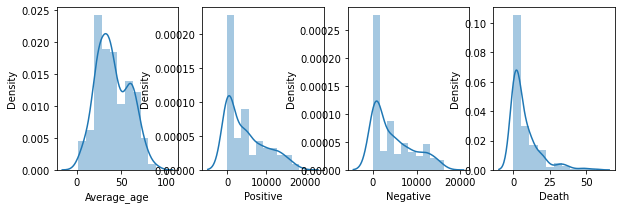

In [ ]:
f, ax = plt.subplots(1, 4, figsize=(10,3))
vis1 = sns.distplot(df['Average_age'],bins=10, ax= ax[0])
vis2 = sns.distplot(df["Positive"],bins=10, ax=ax[1])
vis3 = sns.distplot(df["Negative"],bins=10, ax= ax[2])
vis4 = sns.distplot(df["Death"],bins=10, ax=ax[3])
f.savefig('subplot.png')
print(df.mean())

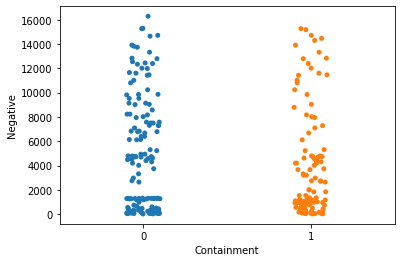

In [ ]:
# Plot initialisation
g=sns.stripplot(x=target, y = df['Negative'])


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 10 Text major ticklabel objects>)

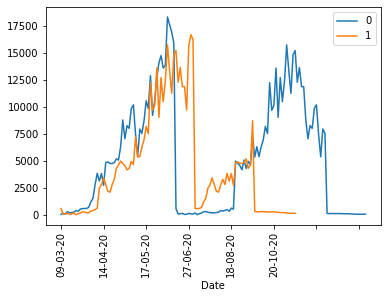

In [ ]:
df.groupby('Containment')['Positive'].plot(legend=True)
plt.xticks(rotation='vertical')

[Text(0, 0, 'Bangalore-Urban'),
 Text(0, 0, 'Kalburgi'),
 Text(0, 0, 'Madikeri'),
 Text(0, 0, 'Chikballarpur'),
 Text(0, 0, 'Mysore'),
 Text(0, 0, 'Dharwad'),
 Text(0, 0, 'Gowribidanur'),
 Text(0, 0, 'Mangalore')]

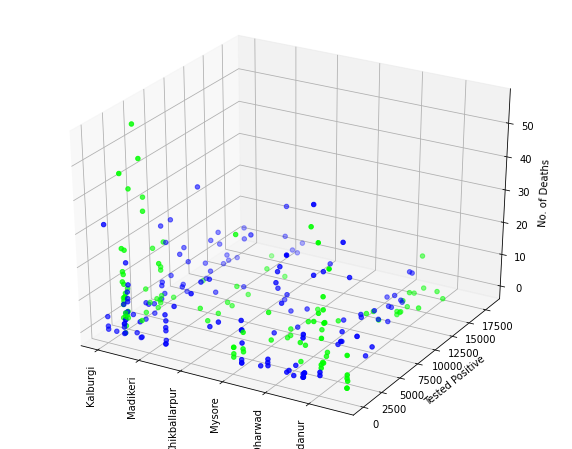

In [ ]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter3D(df['City'].cat.codes, df['Positive'], df['Death'],c = my_color, cmap='brg')
#ax.set_xlabel("City")
plt.xticks(rotation='vertical')
ax.set_ylabel("Tested Positive")
ax.set_zlabel("No. of Deaths")
ax.xaxis.set_ticklabels(df['City'].unique())


In [ ]:
df['City'], _ = pd.factorize(df['City'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 255 entries, 09-03-20 to 19-11-20
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         255 non-null    int64  
 1   Positive     255 non-null    int64  
 2   Negative     255 non-null    int64  
 3   Recovered    255 non-null    float64
 4   Observation  255 non-null    int64  
 5   Death        255 non-null    int64  
 6   Average_age  255 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 25.9+ KB


,City,Positive,Negative,Recovered,Observation,Death,Average_age
Date,,,,,,,
09-03-20,0,579,460,6.0,1452,6,41
10-03-20,0,60,80,0.0,1345,9,62
11-03-20,0,92,50,0.0,1657,11,53
12-03-20,0,131,19,0.0,1877,10,87
13-03-20,0,33,86,1.0,2221,16,26


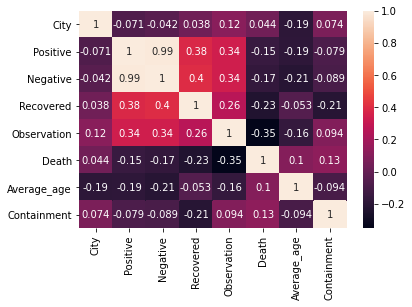

In [ ]:
'''
import plotly.express as px
fig = px.scatter_matrix(
    df,
    dimensions=feature,
    color=my_color)
fig.update_traces(diagonal_visible=False)
fig.show()
'''
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
feature = list(df.head(0))
import numpy as np
print(type(feature), np.asarray(feature).shape, feature)

<class 'list'> (8,) ['City', 'Positive', 'Negative', 'Recovered', 'Observation', 'Death', 'Average_age', 'Containment']


In [ ]:
from sklearn.preprocessing import StandardScaler

# separating target
y = target
df = df.drop(['Containment'], axis=1)
#Standardising features
x = StandardScaler().fit_transform(df)
print(x.shape)


(255, 7)


In [ ]:
#sns.displot(x)
#data = df.to_dict(orient='list')
#print(data)
#print(data.keys())

## 3. PCA execution 

---



In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA()   ###pca = PCA(n_components=2)
components = pca.fit_transform(x)

'''
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(7),
    color=my_color
)
fig.update_traces(diagonal_visible=False)
fig.show()
'''
print(components.shape, x.shape)
print(components[0:5])

(255, 7) (255, 7)
[[-1.44146089e+00 -4.46974940e-01 -4.83960959e-01 -7.64424598e-01
   5.33950268e-01 -4.92950249e-02  3.61826342e-02]
 [-1.86457135e+00 -1.04974255e+00 -7.07685961e-01  1.91758459e-02
   5.91922923e-02 -1.01220598e-01  1.94394915e-03]
 [-1.81006790e+00 -8.39040692e-01 -3.96639913e-01 -2.32286311e-01
   2.15358020e-01  1.30805992e-01  1.35839494e-02]
 [-2.15443218e+00 -1.75368228e+00 -1.11954963e+00  8.90786645e-01
  -5.12725894e-01 -3.24619274e-01  2.09375209e-03]
 [-1.62986644e+00 -1.90377368e-01  4.69344440e-01 -1.01167096e+00
   7.13487477e-01  7.57948406e-01  9.04233378e-03]]


In [ ]:
print('Explained variation per principal component:\n {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component:
 [0.37538925 0.17339266 0.15362767 0.12043332 0.09825226 0.07818185
 0.00072299]


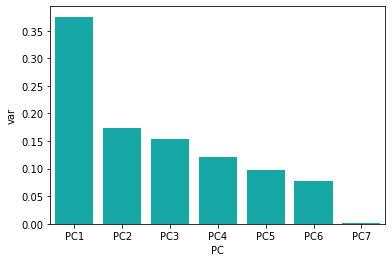

In [ ]:
df_new = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4', 'PC5', 'PC6', 'PC7']})
sns.barplot(x='PC',y="var", 
           data=df_new, color="c");

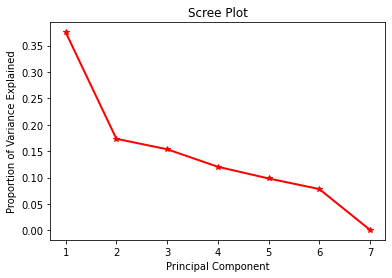

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'r*-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 8 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. 

In [ ]:
    import numpy as np
    from numpy.testing import assert_array_almost_equal

    X_hat = pca.inverse_transform(components)
    #X_train_pca2 = (x - pca.mean_).dot(pca.components_.T)
    #assert_array_almost_equal(X_train_pca, X_train_pca2)

In [ ]:
print(x.shape, X_hat.shape)

(255, 7) (255, 7)


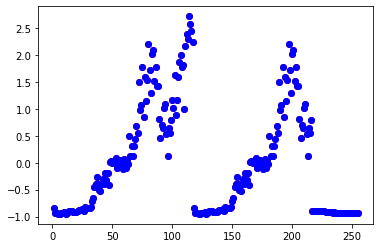

In [ ]:
plt.scatter(np.linspace(1,len(x[:,1]),len(x[:,1])),x[:,1],color='r')
plt.scatter(np.linspace(1,len(x[:,1]),len(x[:,1])),X_hat[:,1], color='b')

In [ ]:
print('projection loss', ((x - X_hat) ** 2).mean())

projection loss 1.3441501008393857e-30


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
discriminants= lda.fit_transform(x,y)

print(discriminants.shape, x.shape)

(255, 1) (255, 7)


Text(0.5, 0, 'PC3')

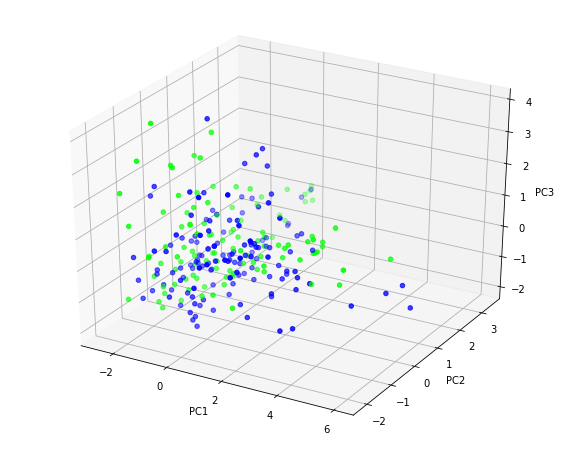

In [ ]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter3D(components[:,0], components[:,1], components[:,2],c = my_color, cmap='brg')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

Text(0, 0.5, 'Containment')

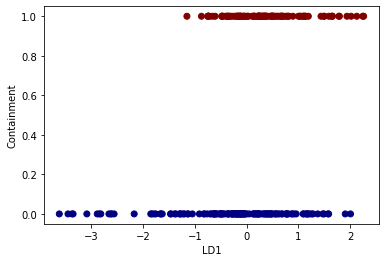

In [ ]:
plt.scatter(discriminants,target, c=my_color, cmap='jet')
plt.xlabel('LD1')
plt.ylabel('Containment')

Text(0, 0.5, 'Containment')

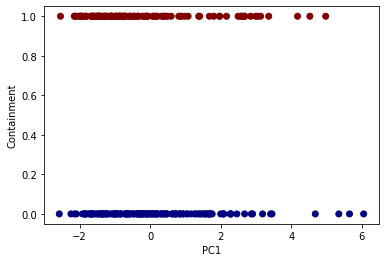

In [ ]:
plt.scatter(components[:,0],target, c=my_color, cmap='jet')
plt.xlabel('PC1')
plt.ylabel('Containment')

**Some other data sets to work **


load_boston() Load and return the boston house-prices dataset (regression).

load_iris() Load and return the iris dataset (classification).

load_diabetes() Load and return the diabetes dataset (regression).

load_digits() Load and return the digits dataset (classification).

load_linnerud() Load and return the physical excercise linnerud dataset.

load_wine() Load and return the wine dataset (classification).

load_breast_cancer() Load and return the breast cancer wisconsin dataset (classification).

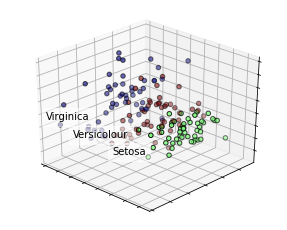

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

###  Split the dataset into the Training set and Test set

###from sklearn.model_selection import train_test_split
###X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

   

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=134)
plt.cla()

pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='jet',
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()